In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten

In [ ]:
count = 0
dirs = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images')
for dir in dirs:
    files = list(os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', dir)))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Medical Leaf Folder has '+ str(count) + ' Images')

Amaranthus Viridis (Arive-Dantu) Folder has 122 Images
Artocarpus Heterophyllus (Jackfruit) Folder has 56 Images
Azadirachta Indica (Neem) Folder has 60 Images
Basella Alba (Basale) Folder has 103 Images
Brassica Juncea (Indian Mustard) Folder has 34 Images
Carissa Carandas (Karanda) Folder has 74 Images
Citrus Limon (Lemon) Folder has 57 Images
Ficus Auriculata (Roxburgh fig) Folder has 50 Images
Ficus Religiosa (Peepal Tree) Folder has 63 Images
Hibiscus Rosa-sinensis Folder has 43 Images
Jasminum (Jasmine) Folder has 71 Images
Mangifera Indica (Mango) Folder has 62 Images
Mentha (Mint) Folder has 97 Images
Moringa Oleifera (Drumstick) Folder has 77 Images
Muntingia Calabura (Jamaica Cherry-Gasagase) Folder has 56 Images
Murraya Koenigii (Curry) Folder has 60 Images
Nerium Oleander (Oleander) Folder has 62 Images
Nyctanthes Arbor-tristis (Parijata) Folder has 40 Images
Ocimum Tenuiflorum (Tulsi) Folder has 52 Images
Piper Betle (Betel) Folder has 48 Images
Plectranthus Amboinicus (Me

## #Load Images into Arrays as Dataset

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'
img_size = 180
batch = 32

In [ ]:
Plant_names = train_ds.class_names
Plant_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [ ]:
import matplotlib.pyplot as plt

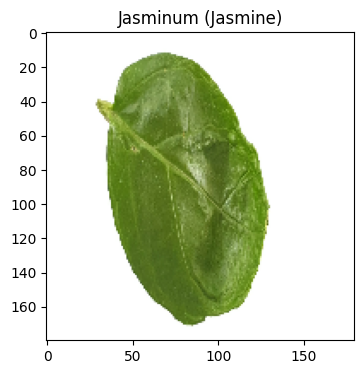

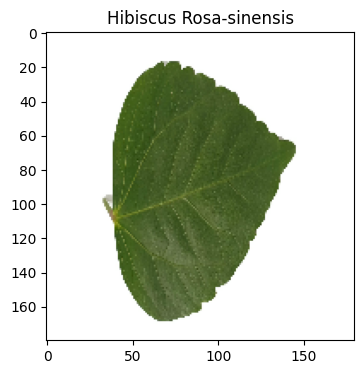

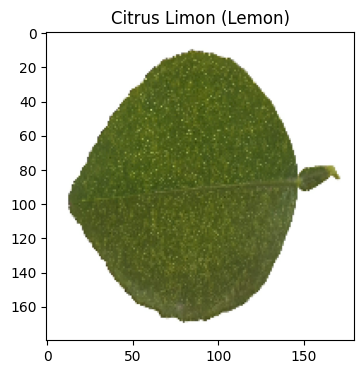

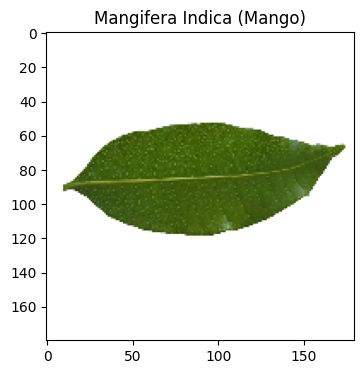

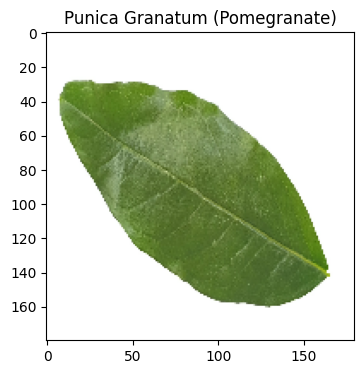

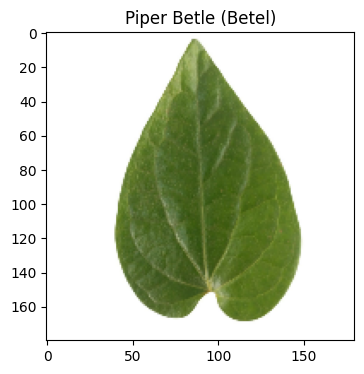

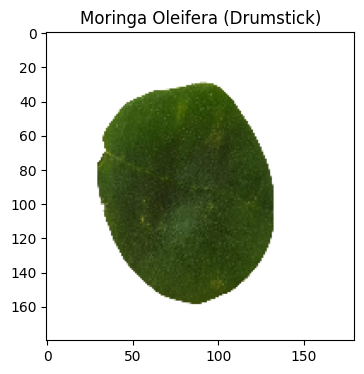

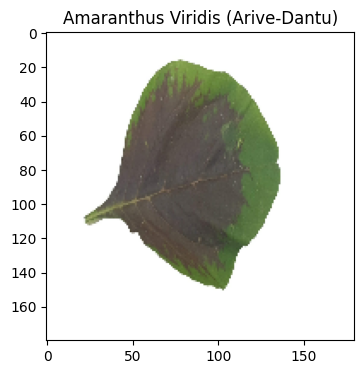

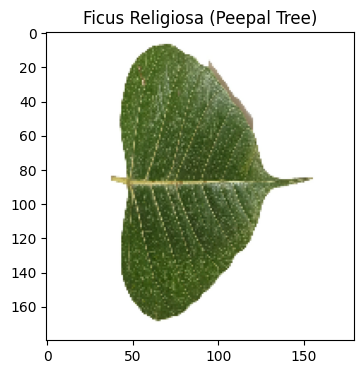

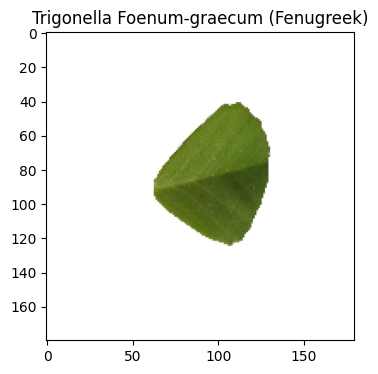

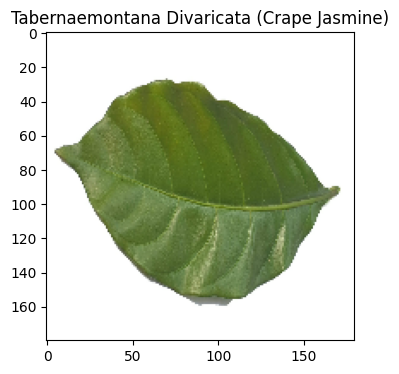

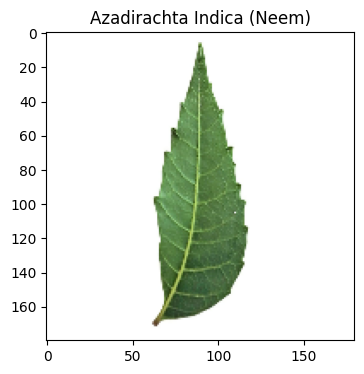

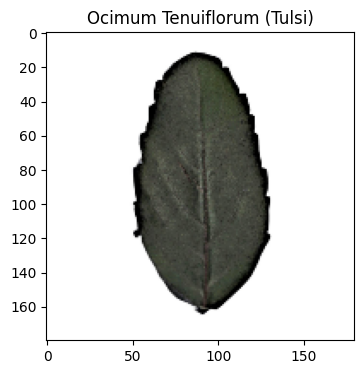

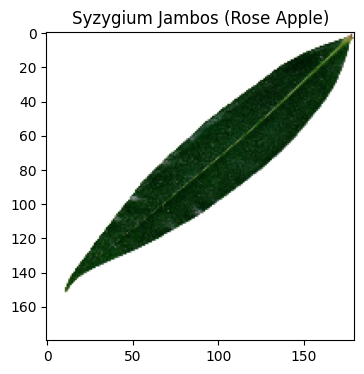

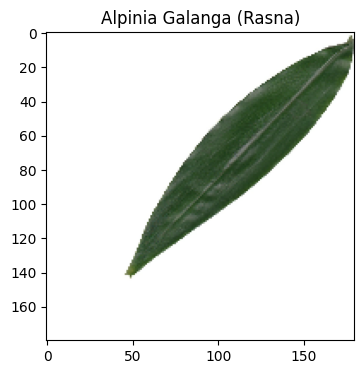

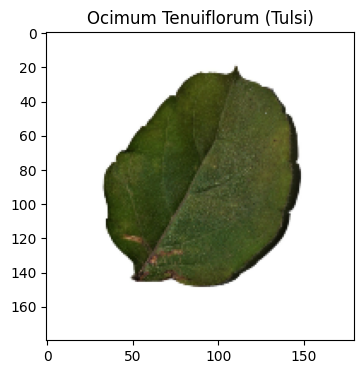

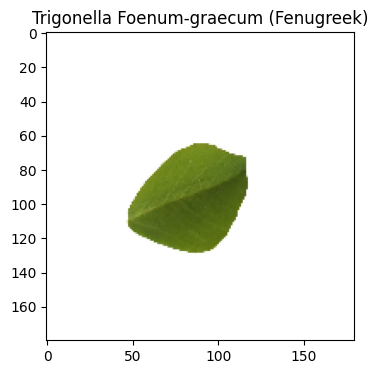

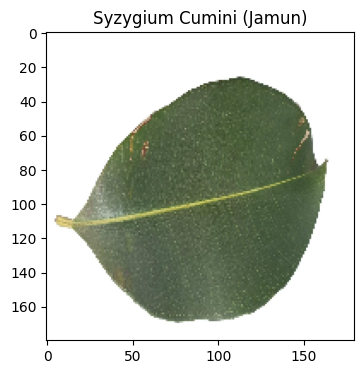

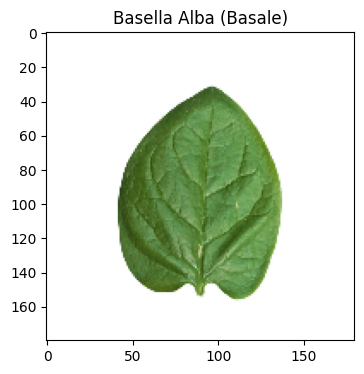

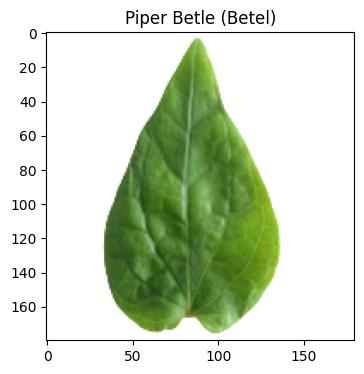

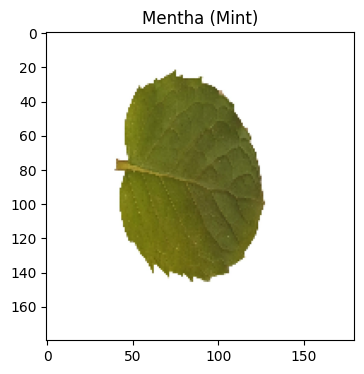

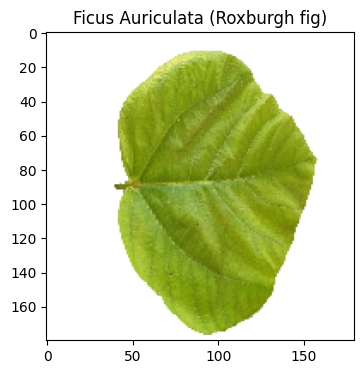

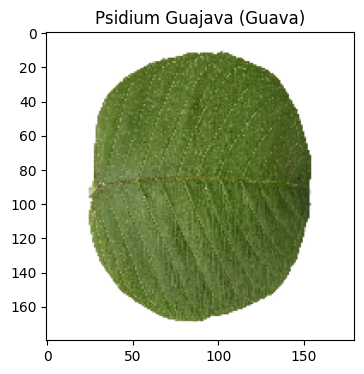

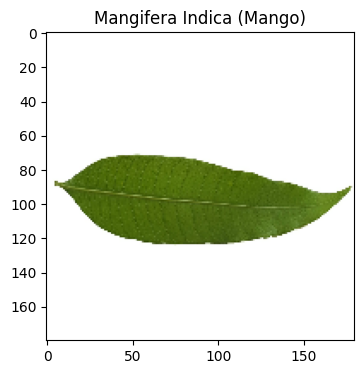

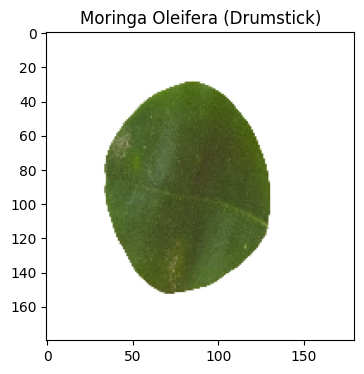

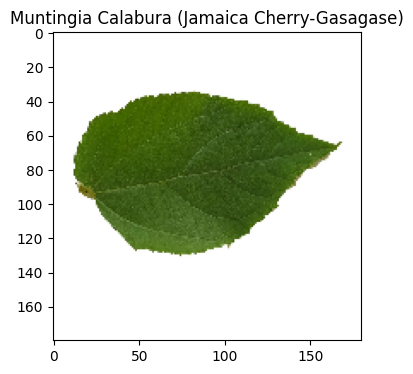

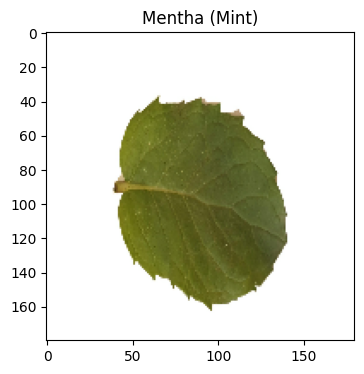

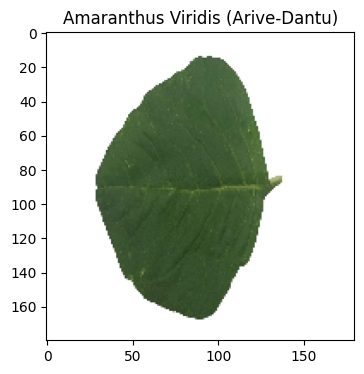

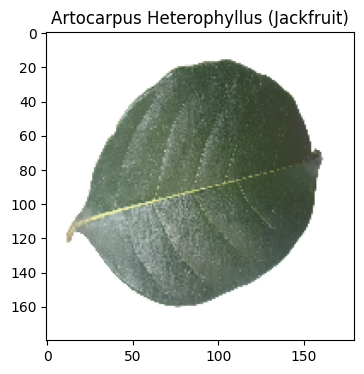

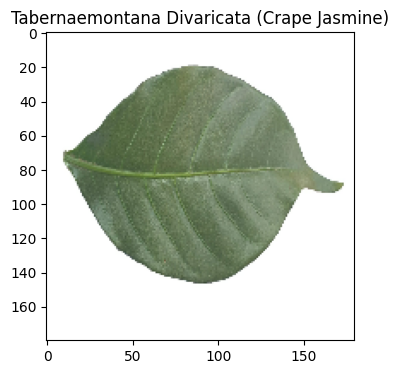

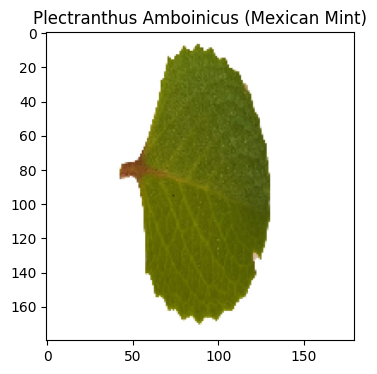

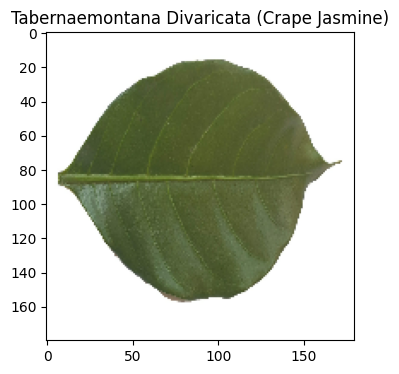

In [ ]:
# Display images of different leaves along with their labels separately
for images, labels in train_ds.take(1):  # Take a single batch of images and labels
    for i in range(len(images)):  # Loop through all images in the batch
        plt.figure(figsize=(4, 4))  # Create a separate figure for each image
        plt.imshow(images[i].numpy().astype('uint8'))  # Display the image
        plt.title(Plant_names[labels[i]])  # Set the title as the label name
        plt.axis('on')  # Remove axes for better visualization
        plt.show()  # Display the plot

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## #Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## #MOdel Creation CNN + LSTM

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(1024, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Reshape((-1, 128)),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(30, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

SGD (Stochastic Gradient Descent)

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# Precision
def precision(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)  # Convert probabilities to class indices
    y_pred = tf.cast(y_pred, tf.int32)  # Cast predictions to int32

# Recall
def recall(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)  # Convert probabilities to class indices
    y_pred = tf.cast(y_pred, tf.int32)  # Cast predictions to int32
    y_true = tf.cast(y_true, tf.int32) # Cast true labels to int32
    tp = K.sum(K.cast(y_true == y_pred, 'float'), axis=0)  # True positives
    fn = K.sum(K.cast((y_true != y_pred) & (y_true == 1), 'float'), axis=0)  # False negatives
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero
    return K.mean(recall)  # Return mean recall across all classes

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]
)

RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]
)

Adagrad

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,431,550 (24.53 MB)

 Trainable params: 6,431,550 (24.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.0542 - loss: 3.3992 - precision: 0.1376 - recall: 0.6676 - val_accuracy: 0.0654 - val_loss: 3.3932 - val_precision: 0.0684 - val_recall: 0.9167
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0593 - loss: 3.3922 - precision: 0.0609 - recall: 0.8786 - val_accuracy: 0.0654 - val_loss: 3.3871 - val_precision: 0.0684 - val_recall: 0.9167
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0686 - loss: 3.3857 - precision: 0.0686 - recall: 0.9363 - val_accuracy: 0.0654 - val_loss: 3.3820 - val_precision: 0.0684 - val_recall: 0.9167
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0724 - loss: 3.3790 - precision: 0.0723 - recall: 0.9332 - val_accuracy: 0.0654 - val_loss: 3.3776 - val_precision: 0.0684 - val_recall: 0.9167
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0773 - loss: 3.3695 - precision: 0.0773 - recall: 0.9736 - val_accuracy: 0.0654 - val_loss: 3.3735 -

In [ ]:
def classify_images(image_dir):
  image_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Jasminum (Jasmine)')
  if not image_files:
        raise FileNotFoundError("No images found in the directory.")
  image_path = os.path.join(image_dir, image_files[0])  # Select the first image
  input_image = tf.keras.utils.load_img(image_dir, target_size=(180,180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array,0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + Plant_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
  return outcome

In [ ]:

from tensorflow.keras import backend as K

# Precision
def precision(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)  # False positives
    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    return K.mean(precision)  # Return mean precision across all classes

# Recall
def recall(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)  # False negatives
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero
    return K.mean(recall)  # Return mean recall across all classes


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]  # Add precision and recall as metrics
)


In [ ]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Carissa Carandas (Karanda)/CC-S-013.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


'The Image belongs to Psidium Guajava (Guava) with a score of 3.5670133'

In [ ]:
model.save('Plant_Recog_Model.h5')

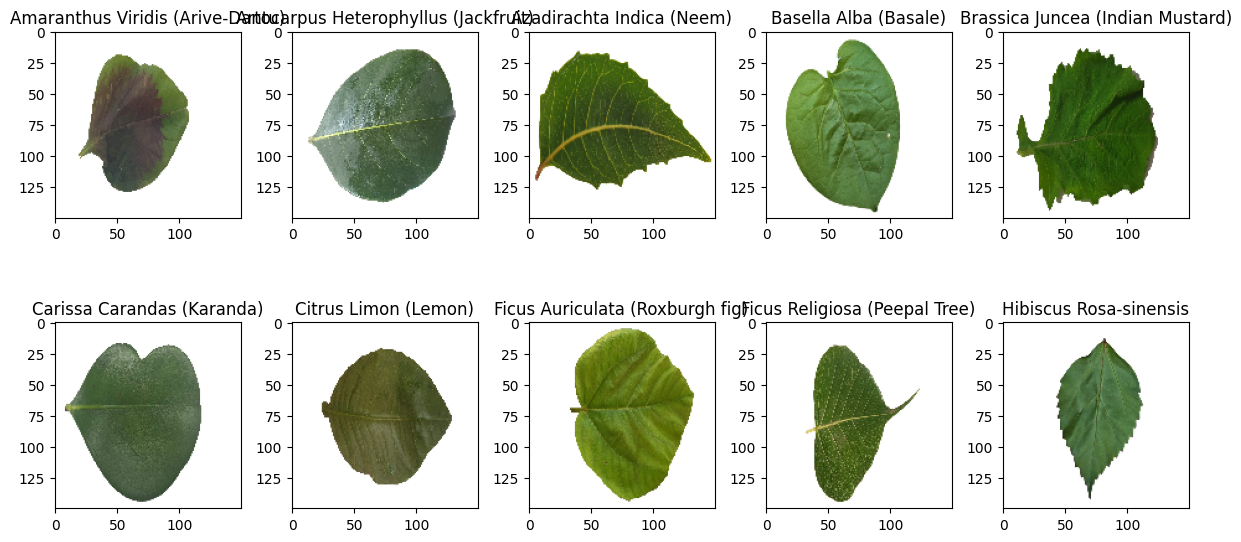

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

# Assuming 'Plant_names' is a list of class names obtained from your dataset
# If not available, replace with the actual list of class names
# ... (previous code) ...

# Create a dictionary to store class counts
class_counts = {}
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'

# Count the images in each class folder
for folder in os.listdir(base_dir):
    class_counts[folder] = len(os.listdir(os.path.join(base_dir, folder)))

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, folder in enumerate(list(class_counts.keys())[:10]):
    img_path = os.path.join(base_dir, folder, os.listdir(os.path.join(base_dir, folder))[0])
    img = load_img(img_path, target_size=(150, 150))
    axes[i//5, i%5].imshow(img)
    axes[i//5, i%5].set_title(folder)
    axes[i//5, i%5].axis('on')
plt.tight_layout()
plt.show()

In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    print("Trend Analysis:")
    print("- If accuracy improves and loss decreases consistently, the model is learning well.")
    print("- If accuracy plateaus and loss fluctuates, learning is stagnating.")
    print("- If validation loss increases while training loss decreases, overfitting is occurring.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis:
- If accuracy improves and loss decreases consistently, the model is learning well.
- If accuracy plateaus and loss fluctuates, learning is stagnating.
- If validation loss increases while training loss decreases, overfitting is occurring.


In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    improving = np.sum(accuracy_diff > 0)
    stagnating = np.sum(accuracy_diff == 0)
    declining = np.sum(accuracy_diff < 0)

    print("Trend Analysis Results:")
    print(f"- Improving Epochs: {improving}")
    print(f"- Stagnating Epochs: {stagnating}")
    print(f"- Declining Epochs: {declining}")

    if declining > improving:
        print("- Model might be overfitting or not generalizing well.")
    elif improving > declining:
        print("- Model is learning effectively.")
    else:
        print("- Model needs tuning as it is stagnating.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis Results:
- Improving Epochs: 4
- Stagnating Epochs: 18
- Declining Epochs: 2
- Model is learning effectively.


In [ ]:
# 6. Anomaly Detection (Blurry vs. Normal Images)
from tensorflow.keras.preprocessing.image import img_to_array # Import img_to_array

def detect_blurry_images(image_paths):
    blurry_images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        variance = np.var(img_array)
        if variance < 1000:  # Threshold for detecting blurriness
            blurry_images.append(img_path)

    print("Anomaly Detection Results:")
    print(f"- Total Blurry Images Detected: {len(blurry_images)}")
    if blurry_images:
        print("- Consider removing or enhancing blurry images for better model accuracy.")
    else:
        print("- No significant blurry images detected.")

    return blurry_images

# Define base directory
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'

# Get a list of subdirectories (folders)
folders = os.listdir(base_dir)

# Generate image paths by iterating through subdirectories and files
image_paths = [os.path.join(base_dir, folder, img)
               for folder in folders
               for img in os.listdir(os.path.join(base_dir, folder))]

blurry_images = detect_blurry_images(image_paths)

Anomaly Detection Results:
- Total Blurry Images Detected: 0
- No significant blurry images detected.
